In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

In [4]:
df=pd.read_excel('glass.xlsx',sheet_name='glass')

In [5]:
df.shape

(214, 10)

In [6]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(1)

In [11]:
df=df.drop_duplicates()

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
corr=df.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


<Axes: >

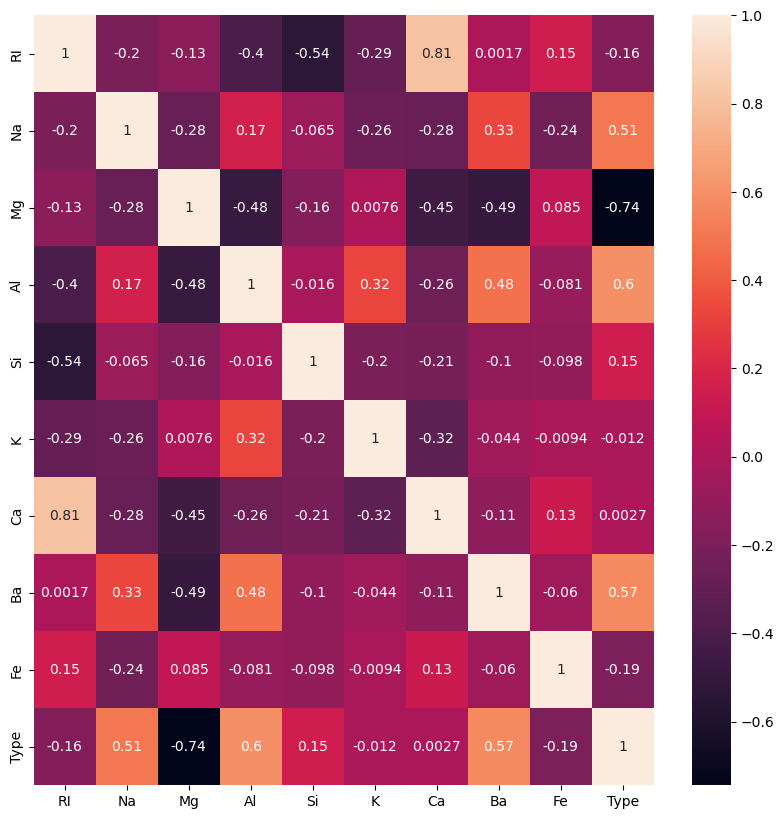

In [14]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

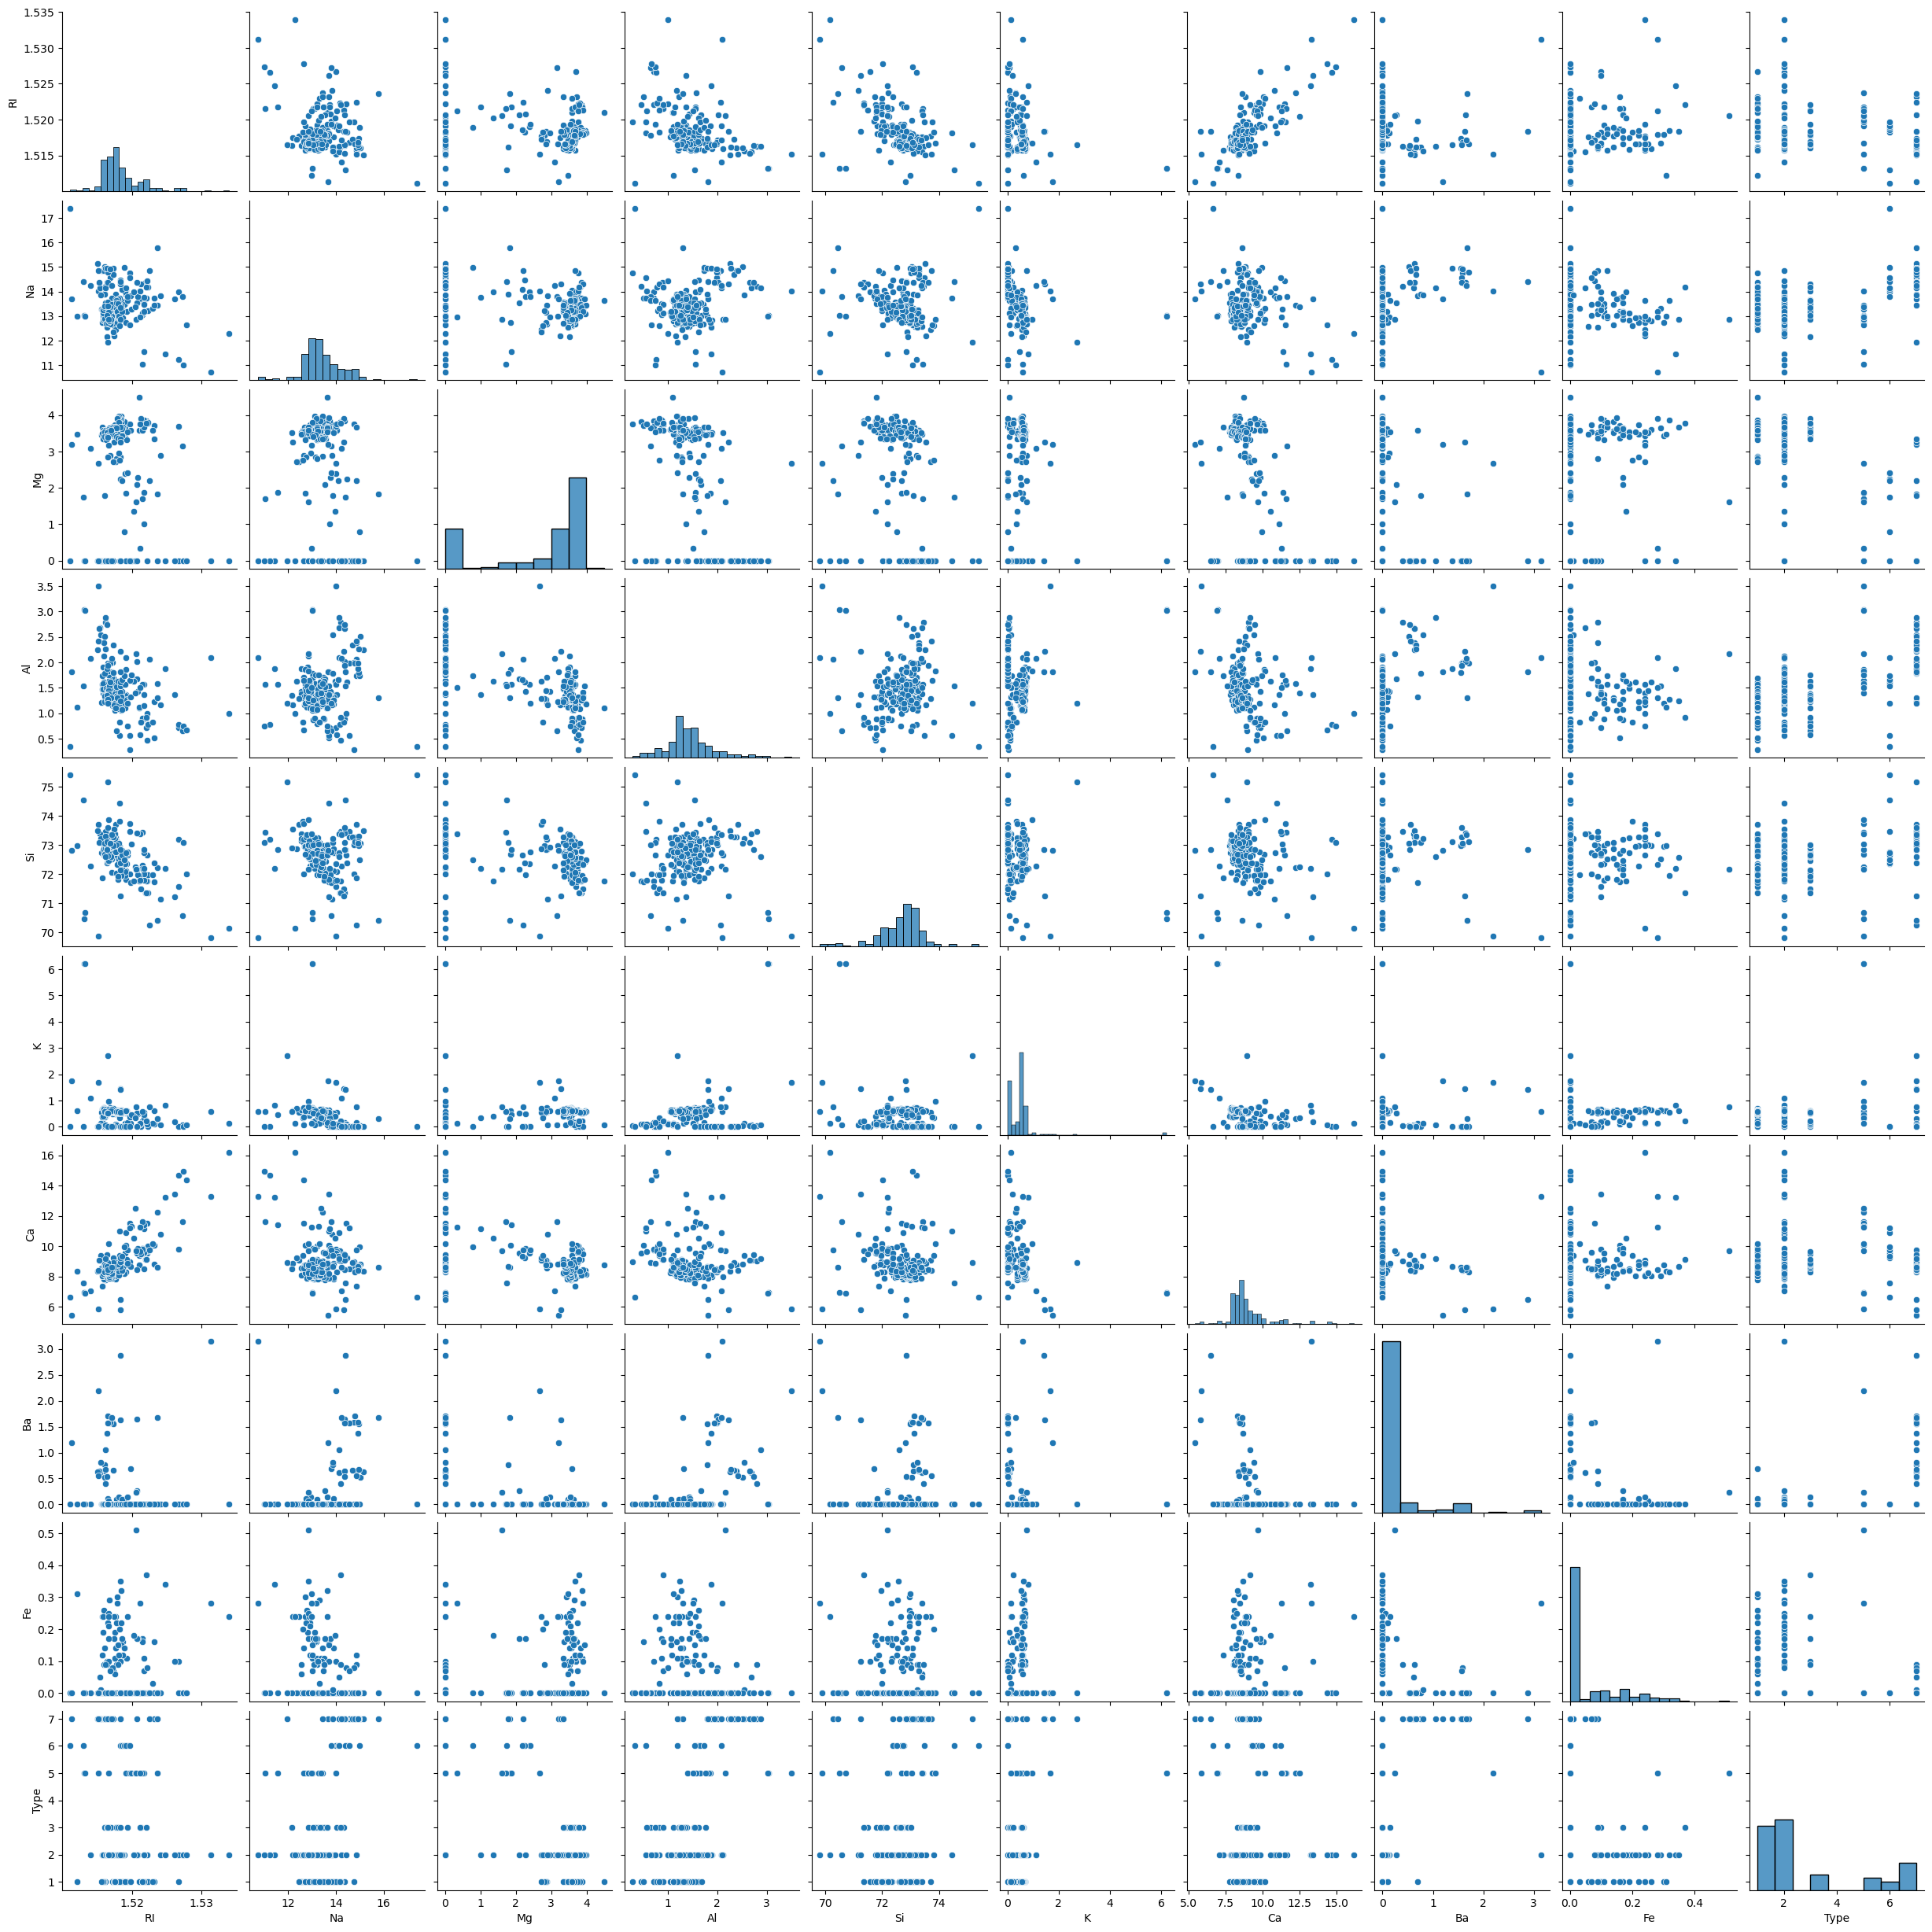

In [15]:
sns.pairplot(df)

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>, <Axes: title={'center': 'Al'}>,
        <Axes: title={'center': 'Si'}>],
       [<Axes: title={'center': 'K'}>, <Axes: title={'center': 'Ca'}>,
        <Axes: title={'center': 'Ba'}>, <Axes: title={'center': 'Fe'}>,
        <Axes: title={'center': 'Type'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

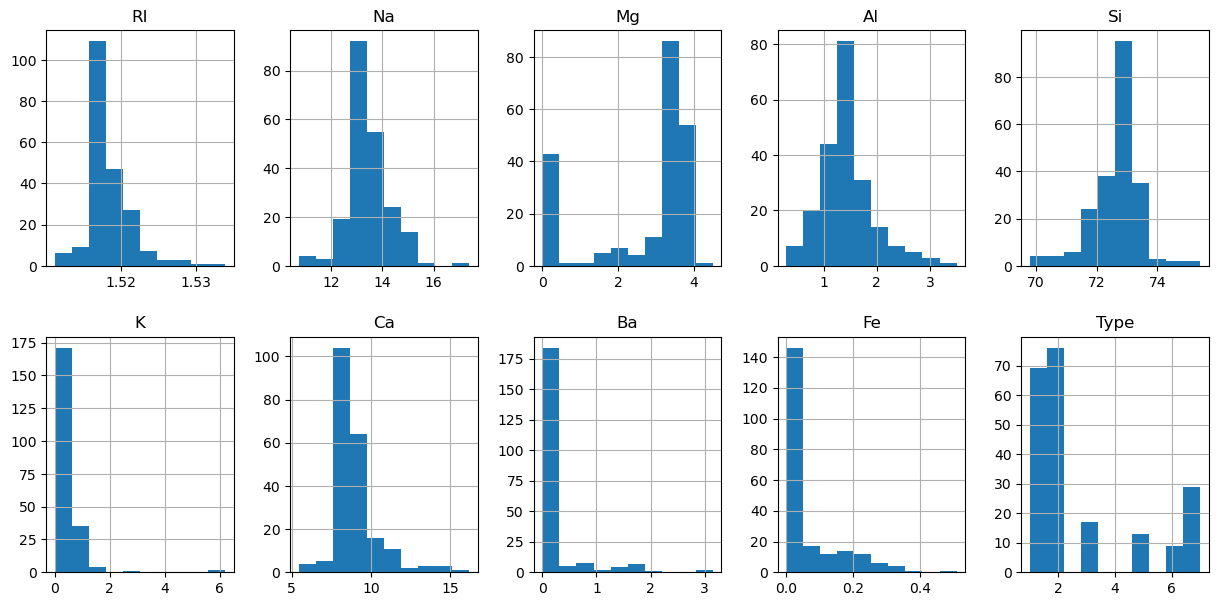

In [16]:
df.hist(figsize=(15,15), layout=(4,5))

In [17]:
target=df[['Type']]
features= df.drop(columns=['Type'])
features.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [18]:
### feature scaling
std_sca=StandardScaler()
std_sca.fit_transform(features)
features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


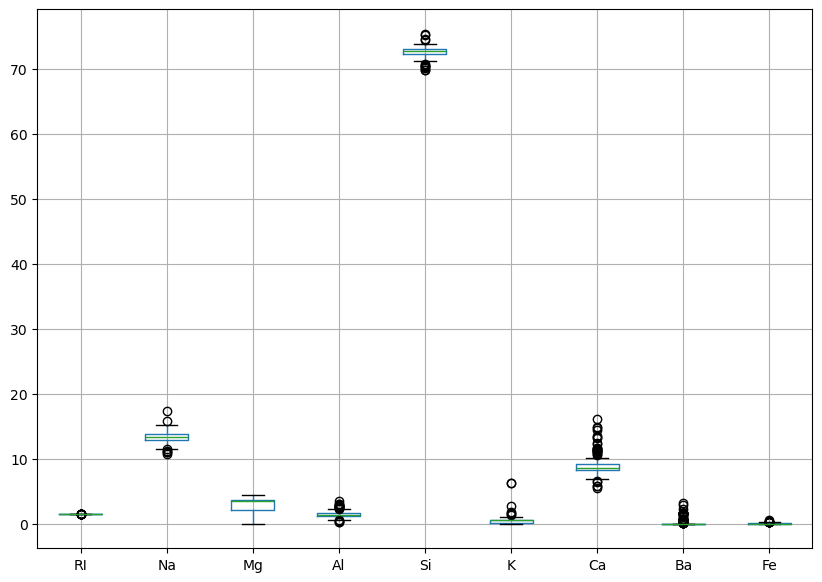

In [19]:
plt.figure(figsize=(10,7))
features.boxplot()
plt.show()

In [20]:
### outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in features.select_dtypes(['int','float']).columns:
    outlier_capping(features,col)

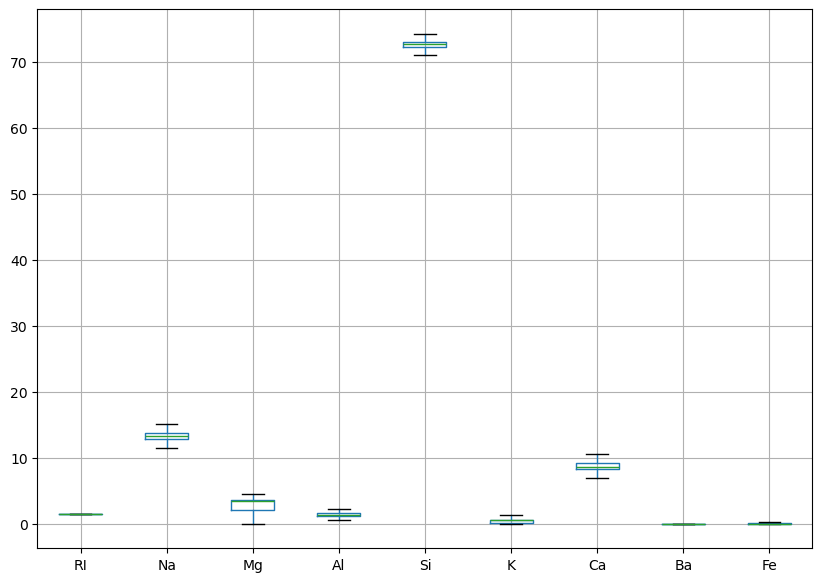

In [21]:
plt.figure(figsize=(10,7))
features.boxplot()
plt.show()

In [22]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(159, 9)
(54, 9)
(159, 1)
(54, 1)


In [23]:
### Random forest classifier

In [24]:
rand_for= RandomForestClassifier(n_estimators=100,bootstrap=True,max_features='sqrt',
                                 max_samples=0.9,random_state=50)

In [25]:
rand_for.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
y_pred=rand_for.predict(x_train)
y_pred

array([2, 1, 2, 7, 1, 7, 1, 2, 1, 2, 2, 5, 1, 2, 2, 7, 6, 7, 2, 2, 7, 2,
       2, 1, 1, 7, 7, 2, 3, 7, 1, 1, 6, 2, 7, 1, 1, 5, 2, 2, 1, 3, 5, 7,
       7, 3, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 3, 1,
       7, 1, 2, 3, 1, 1, 2, 7, 1, 2, 2, 2, 2, 2, 7, 3, 2, 1, 1, 1, 5, 7,
       7, 3, 2, 2, 7, 3, 1, 2, 6, 1, 7, 5, 1, 2, 1, 2, 1, 1, 1, 2, 1, 3,
       2, 1, 1, 1, 3, 2, 2, 1, 2, 7, 1, 6, 1, 2, 7, 2, 1, 2, 2, 2, 3, 2,
       2, 3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 7, 1, 1, 1, 1, 2, 6, 2, 2, 6, 2,
       2, 2, 1, 1, 1])

In [27]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_train,y_pred)

array([[57,  0,  0,  0,  0,  0],
       [ 0, 57,  0,  0,  0,  0],
       [ 0,  0, 13,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  0, 21]])

In [28]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        13
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        21

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159



In [29]:
y_pred1=rand_for.predict(x_test)
y_pred1

array([2, 1, 2, 7, 2, 1, 5, 2, 7, 1, 1, 1, 1, 3, 6, 1, 1, 2, 2, 1, 2, 7,
       2, 2, 5, 3, 2, 2, 1, 7, 2, 1, 7, 1, 2, 5, 2, 1, 6, 5, 2, 1, 1, 2,
       2, 1, 7, 1, 2, 7, 2, 2, 7, 5])

In [30]:
confusion_matrix(y_test,y_pred1)

array([[12,  0,  0,  0,  0,  0],
       [ 2, 15,  1,  0,  0,  1],
       [ 2,  1,  1,  0,  0,  0],
       [ 0,  2,  0,  5,  0,  1],
       [ 0,  1,  0,  0,  2,  0],
       [ 1,  1,  0,  0,  0,  6]])

In [31]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           1       0.71      1.00      0.83        12
           2       0.75      0.79      0.77        19
           3       0.50      0.25      0.33         4
           5       1.00      0.62      0.77         8
           6       1.00      0.67      0.80         3
           7       0.75      0.75      0.75         8

    accuracy                           0.76        54
   macro avg       0.78      0.68      0.71        54
weighted avg       0.77      0.76      0.75        54



In [32]:
### we have got an accuracy of 76% for test result using randomforest classifier.

In [33]:
bag_cls=BaggingClassifier()

In [34]:
bag_cls.fit(x_train,y_train)

,estimator,None
,n_estimators,10
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


In [35]:
pred_bag=bag_cls.predict(x_train)
pred_bag

array([2, 1, 2, 7, 1, 7, 1, 2, 1, 2, 2, 5, 1, 2, 2, 7, 6, 7, 2, 2, 7, 2,
       2, 1, 1, 7, 7, 2, 3, 7, 1, 2, 6, 2, 7, 1, 1, 5, 1, 2, 1, 3, 5, 7,
       7, 3, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 3, 1,
       7, 1, 2, 3, 1, 1, 2, 7, 1, 2, 2, 2, 1, 2, 7, 1, 2, 1, 1, 1, 5, 7,
       7, 3, 2, 2, 7, 3, 1, 2, 6, 1, 7, 5, 1, 2, 1, 2, 1, 1, 1, 2, 1, 3,
       2, 1, 1, 1, 3, 2, 2, 2, 2, 7, 1, 6, 1, 2, 7, 2, 1, 2, 2, 2, 3, 2,
       2, 3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 7, 1, 1, 1, 1, 2, 6, 2, 2, 6, 2,
       2, 2, 1, 1, 1])

In [36]:
print(classification_report(y_train,pred_bag))

              precision    recall  f1-score   support

           1       0.95      0.96      0.96        57
           2       0.96      0.96      0.96        57
           3       1.00      0.92      0.96        13
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        21

    accuracy                           0.97       159
   macro avg       0.99      0.98      0.98       159
weighted avg       0.97      0.97      0.97       159



In [37]:
pred_bag1=bag_cls.predict(x_test)                        #
pred_bag1

array([2, 1, 2, 7, 2, 1, 2, 2, 7, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 1, 5, 7,
       1, 2, 5, 3, 2, 2, 1, 7, 2, 1, 7, 1, 7, 2, 2, 1, 6, 5, 1, 1, 1, 2,
       2, 1, 7, 1, 2, 7, 2, 2, 7, 5])

In [38]:
print(classification_report(y_test,pred_bag1)) 

              precision    recall  f1-score   support

           1       0.60      1.00      0.75        12
           2       0.67      0.63      0.65        19
           3       0.50      0.25      0.33         4
           5       0.75      0.38      0.50         8
           6       1.00      0.33      0.50         3
           7       0.67      0.75      0.71         8

    accuracy                           0.65        54
   macro avg       0.70      0.56      0.57        54
weighted avg       0.67      0.65      0.63        54



In [39]:
### we got an accuracy of 67% ,it is a moderate accuracy 

In [40]:
from sklearn.ensemble import GradientBoostingClassifier              # importing boosting method libraries
grad_boost=GradientBoostingClassifier()

In [41]:
grad_boost.fit(x_train,y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [42]:
pred_boost=grad_boost.predict(x_train)
pred_boost

array([2, 1, 2, 7, 1, 7, 1, 2, 1, 2, 2, 5, 1, 2, 2, 7, 6, 7, 2, 2, 7, 2,
       2, 1, 1, 7, 7, 2, 3, 7, 1, 1, 6, 2, 7, 1, 1, 5, 2, 2, 1, 3, 5, 7,
       7, 3, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 3, 1,
       7, 1, 2, 3, 1, 1, 2, 7, 1, 2, 2, 2, 2, 2, 7, 3, 2, 1, 1, 1, 5, 7,
       7, 3, 2, 2, 7, 3, 1, 2, 6, 1, 7, 5, 1, 2, 1, 2, 1, 1, 1, 2, 1, 3,
       2, 1, 1, 1, 3, 2, 2, 1, 2, 7, 1, 6, 1, 2, 7, 2, 1, 2, 2, 2, 3, 2,
       2, 3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 7, 1, 1, 1, 1, 2, 6, 2, 2, 6, 2,
       2, 2, 1, 1, 1])

In [43]:
print(classification_report(y_train,pred_boost))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        13
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        21

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159



In [44]:
pred_boost1=grad_boost.predict(x_test)
pred_boost1

array([2, 1, 2, 7, 2, 1, 5, 2, 7, 1, 1, 1, 1, 3, 6, 1, 1, 2, 2, 1, 2, 7,
       5, 2, 5, 3, 2, 2, 1, 5, 2, 1, 7, 1, 7, 5, 2, 1, 6, 5, 2, 1, 1, 2,
       2, 1, 7, 1, 2, 7, 2, 2, 7, 5])

In [45]:
print(classification_report(y_test,pred_boost1))

              precision    recall  f1-score   support

           1       0.71      1.00      0.83        12
           2       0.78      0.74      0.76        19
           3       0.50      0.25      0.33         4
           5       0.86      0.75      0.80         8
           6       1.00      0.67      0.80         3
           7       0.75      0.75      0.75         8

    accuracy                           0.76        54
   macro avg       0.77      0.69      0.71        54
weighted avg       0.76      0.76      0.75        54



In [46]:
### here we got accuracy of 74% , which is good to develop the model

In [47]:
### 1) Bagging(Bootstrap Aggregating) creates multiple independent models, each model is trained in parallel.
### Boosting builds models sequentially, where each new model focuses on correcting the errors of the previous models,models are weighted based on their performance.
### diffence b/w bagging and boosting is bagging reduces variance whereas boosting reduces bias

In [48]:
### 2) to handle the imbalanced data we use techniques like resampling,class weighting,evaluation metrics etc
### oversampling increase the number of minority class samples,undersamping reduce the number of majority class samples
### evaluation use metrics like precision, recall, F1-score, ROC-AUC instead of just accuracy.